## 3. KNN Classification


## Case Study -
### Data : Prostate Cancer data

## One of the leading Cancer Research institute is working on a research project to 
## understand the structural properties of various Prostate Cancer tumors and make some 
## conclusion to distinguish between Malignant and Benign Tumors based on the structural differences
## The main objective is to use these properties to classify the tumors into correct categories 
## (Malignant and Benign).


### Dependent variable - Diagnosis_result (Type : Malignant (M) or Benign (B) cancer)
### Independent variables - All other

In [65]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')
import os
os.getcwd()

'D:\\Anaconda_Python\\Python_Code'

In [66]:
os.chdir("D:\Anaconda_Python\Python_Code")

In [67]:
data = pd.read_csv("Prostate_Cancer.csv")

In [68]:
pd.options.display.max_rows = 999

In [69]:
data.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
id                   100 non-null int64
diagnosis_result     100 non-null object
radius               100 non-null int64
texture              100 non-null int64
perimeter            100 non-null int64
area                 100 non-null int64
smoothness           100 non-null float64
compactness          100 non-null float64
symmetry             100 non-null float64
fractal_dimension    100 non-null float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [71]:
data.describe()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [72]:
data.diagnosis_result.value_counts()

M    62
B    38
Name: diagnosis_result, dtype: int64

## Missing data Handling

In [73]:
pd.isna(data.diagnosis_result).value_counts()

False    100
Name: diagnosis_result, dtype: int64

#### 1.2  Categorical Data Handling 

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
id                   100 non-null int64
diagnosis_result     100 non-null object
radius               100 non-null int64
texture              100 non-null int64
perimeter            100 non-null int64
area                 100 non-null int64
smoothness           100 non-null float64
compactness          100 non-null float64
symmetry             100 non-null float64
fractal_dimension    100 non-null float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [75]:
object_cols = list(data.select_dtypes(include=['category','object']))

In [76]:
object_cols

['diagnosis_result']

## Using Label Encoder

In [77]:
from sklearn.preprocessing import LabelEncoder

In [78]:
le = LabelEncoder()

In [79]:
label = le.fit_transform(data.diagnosis_result)

In [80]:
label

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1])

In [81]:
data = data.join(pd.DataFrame({'label':label}))

In [82]:
data.drop('diagnosis_result',axis=1,inplace=True)

In [83]:
data.head()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,label
0,1,23,12,151,954,0.143,0.278,0.242,0.079,1
1,2,9,13,133,1326,0.143,0.079,0.181,0.057,0
2,3,21,27,130,1203,0.125,0.160,0.207,0.060,1
3,4,14,16,78,386,0.070,0.284,0.260,0.097,1
4,5,9,19,135,1297,0.141,0.133,0.181,0.059,1


#### 1.3 Splitting data into Training and Test Data Sets

In [84]:
data.label.value_counts()

1    62
0    38
Name: label, dtype: int64

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
id                   100 non-null int64
radius               100 non-null int64
texture              100 non-null int64
perimeter            100 non-null int64
area                 100 non-null int64
smoothness           100 non-null float64
compactness          100 non-null float64
symmetry             100 non-null float64
fractal_dimension    100 non-null float64
label                100 non-null int32
dtypes: float64(4), int32(1), int64(5)
memory usage: 7.5 KB


In [87]:
data_X = data.iloc[:,[0,1,2,3,4,5,6,7,8,9]]

In [88]:
data_y = data[:]['label']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=100)


In [90]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 32 to 8
Data columns (total 10 columns):
id                   70 non-null int64
radius               70 non-null int64
texture              70 non-null int64
perimeter            70 non-null int64
area                 70 non-null int64
smoothness           70 non-null float64
compactness          70 non-null float64
symmetry             70 non-null float64
fractal_dimension    70 non-null float64
label                70 non-null int32
dtypes: float64(4), int32(1), int64(5)
memory usage: 5.7 KB


In [91]:
y_train

32    1
6     1
3     1
12    0
51    0
84    0
73    1
64    1
54    1
68    0
75    1
74    0
57    1
42    1
76    0
99    1
17    1
93    0
63    0
0     1
18    1
44    1
38    1
45    1
39    1
70    1
94    1
30    1
71    0
46    0
56    1
80    0
91    1
88    0
19    0
81    0
55    0
89    0
61    0
65    1
47    1
49    0
7     1
97    0
59    0
95    1
13    1
1     0
31    1
4     1
27    1
2     1
9     1
16    1
58    0
60    0
15    1
98    0
34    1
14    1
66    0
53    1
52    0
10    1
48    0
79    0
87    1
67    0
24    1
8     1
Name: label, dtype: int32

In [92]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 37 to 20
Data columns (total 10 columns):
id                   30 non-null int64
radius               30 non-null int64
texture              30 non-null int64
perimeter            30 non-null int64
area                 30 non-null int64
smoothness           30 non-null float64
compactness          30 non-null float64
symmetry             30 non-null float64
fractal_dimension    30 non-null float64
label                30 non-null int32
dtypes: float64(4), int32(1), int64(5)
memory usage: 2.5 KB


In [93]:
y_test

37    0
62    1
26    1
41    1
35    1
25    1
36    1
33    1
77    1
21    0
85    1
50    0
92    0
69    0
96    0
78    1
72    1
5     0
40    1
11    1
29    1
83    1
82    1
43    1
28    1
22    1
23    1
90    0
86    1
20    0
Name: label, dtype: int32

In [94]:
import seaborn as sns

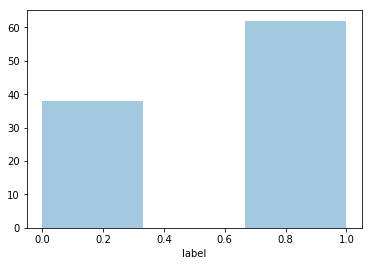

In [95]:
sns.distplot(data.label,kde=False,bins=3)

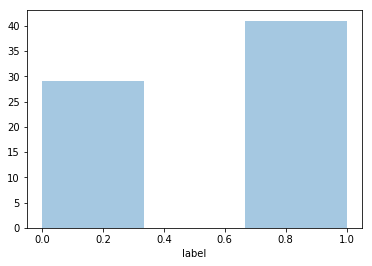

In [96]:
sns.distplot(y_train,kde=False,bins=3)

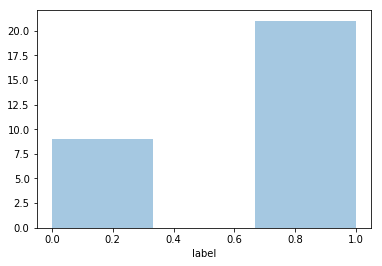

In [97]:
sns.distplot(y_test,kde=False,bins=3)

## Feature Selection - Checking Correlation to get perfect set of indipendent variables

In [98]:
cr = data.corr()

In [99]:
cr

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,label
id,1.000000,0.047276,0.052263,-0.215953,-0.174354,-0.258328,-0.277554,-0.222334,-0.164946,-0.316889
radius,0.047276,1.000000,0.100245,-0.238216,-0.250934,-0.127121,-0.191490,-0.039707,-0.029120,-0.176967
texture,0.052263,0.100245,1.000000,-0.113453,-0.113725,0.102321,0.032446,0.077912,0.139157,0.070735
perimeter,-0.215953,-0.238216,-0.113453,1.000000,0.976648,0.269442,0.527542,0.195539,-0.195434,0.607498
area,-0.174354,-0.250934,-0.113725,0.976648,1.000000,0.208438,0.424950,0.110435,-0.274344,0.562444
smoothness,-0.258328,-0.127121,0.102321,0.269442,0.208438,1.000000,0.465723,0.424203,0.369580,0.197616
compactness,-0.277554,-0.191490,0.032446,0.527542,0.424950,0.465723,1.000000,0.681123,0.647953,0.512234
symmetry,-0.222334,-0.039707,0.077912,0.195539,0.110435,0.424203,0.681123,1.000000,0.568608,0.233028
fractal_dimension,-0.164946,-0.029120,0.139157,-0.195434,-0.274344,0.369580,0.647953,0.568608,1.000000,0.008180
label,-0.316889,-0.176967,0.070735,0.607498,0.562444,0.197616,0.512234,0.233028,0.008180,1.000000


In [100]:
cr['label']

id                  -0.316889
radius              -0.176967
texture              0.070735
perimeter            0.607498
area                 0.562444
smoothness           0.197616
compactness          0.512234
symmetry             0.233028
fractal_dimension    0.008180
label                1.000000
Name: label, dtype: float64

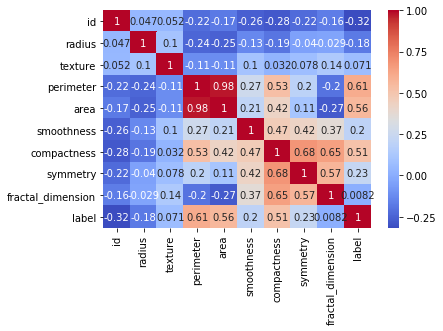

In [101]:
sns.heatmap(cr,annot=True,cmap="coolwarm")

## Conclusion - Selected independent variables : radius,perimeter,area,smoothness,compactness,symmetry
## building linear Model

In [102]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 32 to 8
Data columns (total 10 columns):
id                   70 non-null int64
radius               70 non-null int64
texture              70 non-null int64
perimeter            70 non-null int64
area                 70 non-null int64
smoothness           70 non-null float64
compactness          70 non-null float64
symmetry             70 non-null float64
fractal_dimension    70 non-null float64
label                70 non-null int32
dtypes: float64(4), int32(1), int64(5)
memory usage: 5.7 KB


In [103]:
X_train.drop(['id','texture','fractal_dimension'],axis=1,inplace=True)

In [104]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 32 to 8
Data columns (total 7 columns):
radius         70 non-null int64
perimeter      70 non-null int64
area           70 non-null int64
smoothness     70 non-null float64
compactness    70 non-null float64
symmetry       70 non-null float64
label          70 non-null int32
dtypes: float64(3), int32(1), int64(3)
memory usage: 4.1 KB


In [105]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 37 to 20
Data columns (total 10 columns):
id                   30 non-null int64
radius               30 non-null int64
texture              30 non-null int64
perimeter            30 non-null int64
area                 30 non-null int64
smoothness           30 non-null float64
compactness          30 non-null float64
symmetry             30 non-null float64
fractal_dimension    30 non-null float64
label                30 non-null int32
dtypes: float64(4), int32(1), int64(5)
memory usage: 2.5 KB


In [106]:
X_test.drop(['id','texture','fractal_dimension'],axis=1,inplace=True)

In [107]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 37 to 20
Data columns (total 7 columns):
radius         30 non-null int64
perimeter      30 non-null int64
area           30 non-null int64
smoothness     30 non-null float64
compactness    30 non-null float64
symmetry       30 non-null float64
label          30 non-null int32
dtypes: float64(3), int32(1), int64(3)
memory usage: 1.8 KB


## Check for Classification boundries

In [108]:
import matplotlib.cm as cm
colors = cm.rainbow(y_train*500)
import matplotlib.pyplot as plt

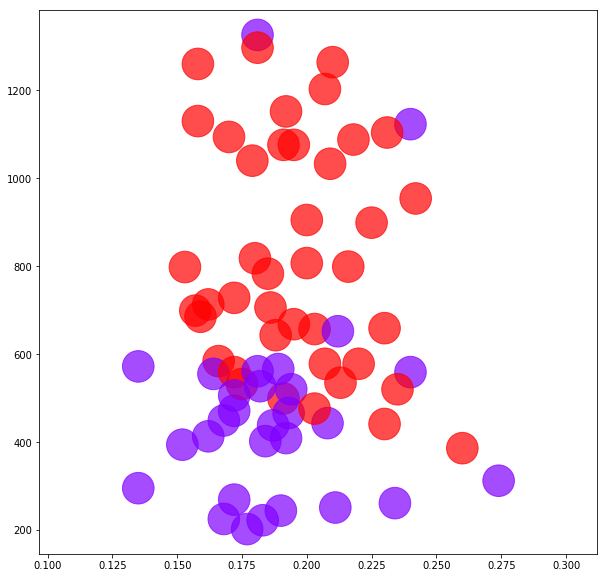

In [109]:
fig,axes = plt.subplots(figsize=(10,10))
axes.scatter(X_train.symmetry,X_train.area,c=colors,alpha=0.7,s=1000)

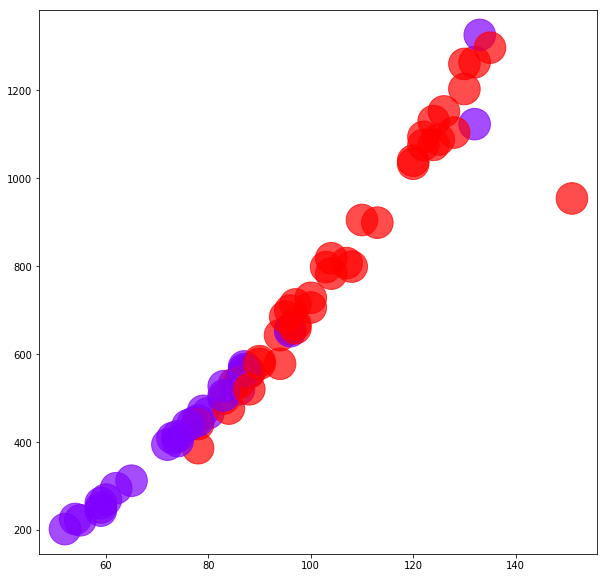

In [110]:
fig,axes = plt.subplots(figsize=(10,10))
axes.scatter(X_train.perimeter,X_train.area,c=colors,alpha=0.7,s=1000)

## Build the Model


In [111]:
from sklearn.neighbors import KNeighborsClassifier

In [112]:
knn = KNeighborsClassifier(n_neighbors=5)


# Train the model using the training sets

In [113]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

## Predicting death_rate for test dataset using model

In [114]:
y_pred = knn.predict(X_test)
res = pd.DataFrame({'y_act':y_test,'y_pred':y_pred})

In [115]:
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0])

## Analyze your model performance visually

In [116]:
import matplotlib.cm as cm
colors1 = cm.rainbow(y_test*500)
colors2= cm.rainbow(y_pred*500)

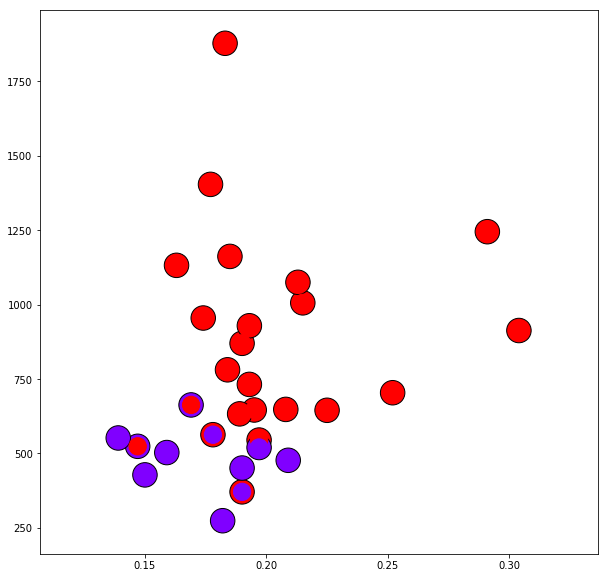

In [117]:
fig,axes = plt.subplots(figsize=(10,10))
axes.scatter(X_test.symmetry,X_test.area,c=colors1,s=600,edgecolor='black')
axes.scatter(X_test.symmetry,X_test.area,c=colors2,s=300)

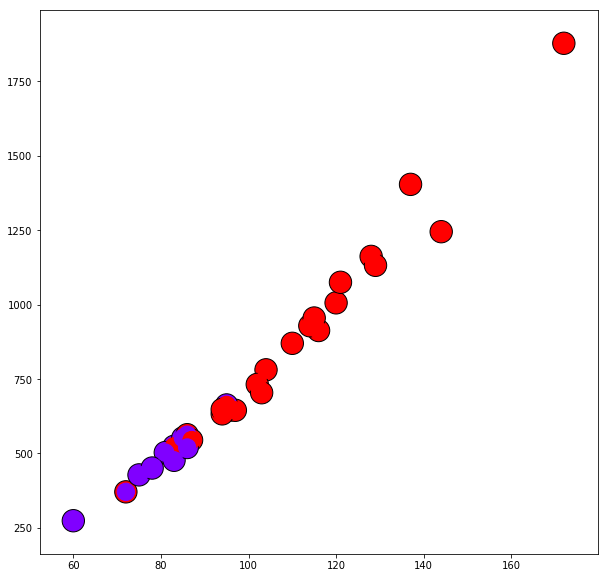

In [118]:
fig,axes = plt.subplots(figsize=(10,10))
axes.scatter(X_test.perimeter,X_test.area,c=colors1,s=500,edgecolor='black')
axes.scatter(X_test.perimeter,X_test.area,c=colors2,s=300)

## Model Evaluation - Confusion Matrix

In [119]:
from sklearn.metrics import confusion_matrix

In [120]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [121]:
print(cnf_matrix)

[[ 7  2]
 [ 2 19]]


In [122]:
acc = (cnf_matrix[0,0]+cnf_matrix[1,1])/(cnf_matrix[0,0]+cnf_matrix[0,1]+cnf_matrix[1,0]+cnf_matrix[1,1])

In [63]:
acc

0.8666666666666667